In [1]:
# takes 9m
# create acbl and tcg result score/matchpoint dictionaries
# experiment with result dictionaries
# create some charts

# previous steps:
# acbl-board-results-cleanup.ipynb created acbl-board-results-cleaned.pkl
# TheCommonGameCommonResultsHtmlToPickle.py created ../TheCommonGame/tcg_boards_df.pkl.

# todo:
# write acbl and tcg results to sql file?
# be able to view acbl and tcg results per board result
# use acbl or tcg results. Depends on num_of_tables?
# experiment with writing df to excel file.

# Questions to answer:
# How often do players play Par contract? e.g. 60%?
# Who are the players with best ability to bid Par? Requires using actual bids.
# Who are the players with best ability to make Par?
# Who are the players that make Par or better?
# For Par contracts, what is the frequency of variance in tricks? e.g. -2, -1, 0 +1, +2
# How do players fair per round? Do some players excel in early or late rounds?

In [2]:
# requirements:
# obsolete -- conda install -c conda-forge brotli

In [3]:
import pandas as pd
from collections import defaultdict
import pathlib
import pickle
import mlBridgeLib
import matplotlib.pyplot as plt

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
tcgPath = rootPath.joinpath('TheCommonGame')

In [6]:
# takes 15s
# read acbl results df
acbl_board_results_file = acblPath.joinpath('acbl-board-results-cleaned.pkl')
acbl_cgdf = pd.read_pickle(acbl_board_results_file)
acbl_cgdf

,Key,ClubDate,EventBoard,HandRecord,Board,Pair,NNum,NName,SNum,SName,ENum,EName,WNum,WName,PairNS,PairEW,MP_NS,MP_EW,Score,Par,MatchP,Pct,NSPair,EWPair,BidLvl,BidSuit,Dbl,NSEW,Tricks,Declarer,OnLead,Dummy,NotOnLead,EventBoardScore
8625,100222_190821E_01,100222_190821E,190821E_01,8861,01,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",-100,400,3.50,0.50,D02,D02,1,N,,N,-2,9264256,7396295,2961628,6497594,190821E_01_-100
8626,100222_190821E_02,100222_190821E,190821E_02,8861,02,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",100,-460,5.00,0.71,D02,D02,4,D,,W,-2,6497594,9264256,7396295,2961628,190821E_02_100
8627,100222_190821E_03,100222_190821E,190821E_03,8861,03,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",-100,-120,1.00,0.14,D02,D02,6,D,,S,-2,2961628,6497594,9264256,7396295,190821E_03_-100
8628,100222_190821E_04,100222_190821E,190821E_04,8861,04,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",-690,-100,2.00,0.29,D06,D02,3,N,,E,+3,7396295,2670356,6497594,5630401,190821E_04_-690
8629,100222_190821E_05,100222_190821E,190821E_05,8861,05,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",180,300,3.00,0.43,D06,D02,2,N,,S,+2,2670356,6497594,5630401,7396295,190821E_05_180
8630,100222_190821E_06,100222_190821E,190821E_06,8861,06,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",460,140,6.50,0.93,D06,D02,3,N,,N,+2,5630401,7396295,2670356,6497594,190821E_06_460
8631,100222_190821E_19,100222_190821E,190821E_19,8861,19,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",-50,990,5.50,0.79,D05,D02,4,D,,N,-1,4458079,7396295,4632036,6497594,190821E_19_-50
8632,100222_190821E_20,100222_190821E,190821E_20,8861,20,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",200,-990,4.00,0.57,D05,D02,2,C,,E,-2,7396295,4632036,6497594,4458079,190821E_20_200
8633,100222_190821E_21,100222_190821E,190821E_21,8861,21,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",-170,-300,4.00,0.57,D05,D02,3,H,,W,+1,6497594,4458079,7396295,4632036,190821E_21_-170
8634,100222_190821E_07,100222_190821E,190821E_07,8861,07,D03_D02,2620499,"""Walker, Mildred""",5378710,"""Gilbreath, Sue(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",2620499_5378710,7396295_6497594,"[179.0, 1825.03]","[104.69, 1832.54]",-200,-100,4.50,0.64,D03,D02,3,S,,E,+2,7396295,5378710,6497594,2620499,190821E_07_-200


In [7]:
acbl_player_name_dict = acblPath.joinpath('acbl_player_name_dict.pkl')
with open(acbl_player_name_dict,'rb') as f:
    acbl_playerd = pickle.load(f)

In [8]:
acbl_playerd['2663279']

'Salita, Robert'

<AxesSubplot:>

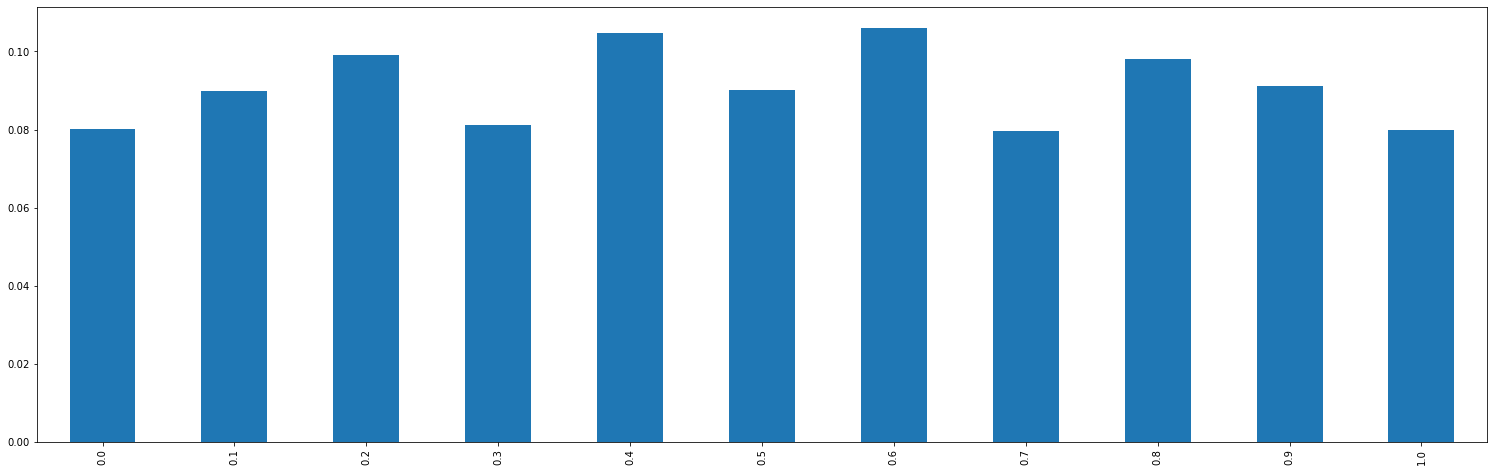

In [9]:
# takes 1s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
acbl_cgdf['Pct'].astype('float').round(1).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(26,8))

In [10]:
# takes 1m10s
# todo: move 'Declarer_Pct' to acbl-board-results-cleanup?
# Create 'Declarer_Pct' for 'Pct' relative to declarer's direction; 'Pct' for NS or 1-'Pct' for EW. Essentially make all NS.
acbl_cgdf['Declarer_Pct'] = acbl_cgdf[['Pct','NSEW']].apply(lambda r: r['Pct'] if r['NSEW'] in 'NS' else 1-r['Pct'],axis='columns')
acbl_cgdf[['Pct','Declarer_Pct','NSEW']]

,Pct,Declarer_Pct,NSEW
8625,0.50,0.50,N
8626,0.71,0.29,W
8627,0.14,0.14,S
8628,0.29,0.71,E
8629,0.43,0.43,S
8630,0.93,0.93,N
8631,0.79,0.79,N
8632,0.57,0.43,E
8633,0.57,0.43,W
8634,0.64,0.36,E


In [11]:
# takes 2m
# todo: move 'Declarer_Score' to acbl-board-results-cleanup?
# Create 'Declarer_Score' for 'Score' relative to declarer's direction; 'Score' for NS or -'Score' for EW. Essentially make all NS.
acbl_cgdf['Declarer_Score'] = acbl_cgdf[['Score','NSEW']].apply(lambda r: r['Score'] if not r['Score'][r['Score'][0] == '-':].isnumeric() or r['NSEW'] in 'NS' else str(-int(r['Score'])),axis='columns')
acbl_cgdf[['NSEW','Pct','Declarer_Pct','Score','Declarer_Score']]

,NSEW,Pct,Declarer_Pct,Score,Declarer_Score
8625,N,0.50,0.50,-100,-100
8626,W,0.71,0.29,100,-100
8627,S,0.14,0.14,-100,-100
8628,E,0.29,0.71,-690,690
8629,S,0.43,0.43,180,180
8630,N,0.93,0.93,460,460
8631,N,0.79,0.79,-50,-50
8632,E,0.57,0.43,200,-200
8633,W,0.57,0.43,-170,170
8634,E,0.64,0.36,-200,200


In [12]:
# takes 1m10s
# todo: move 'Declarer_Pct' to acbl-board-results-cleanup?
# Create 'Declarer_Pct' for 'Pct' relative to declarer's direction; 'Pct' for NS or 1-'Pct' for EW. Essentially make all NS.
acbl_cgdf['Declarer_Par'] = acbl_cgdf[['Par','NSEW']].apply(lambda r: r['Par'] if r['NSEW'] in 'NS' else -r['Par'],axis='columns')
acbl_cgdf[['Par','Declarer_Par','NSEW']]

,Par,Declarer_Par,NSEW
8625,400,400,N
8626,-460,460,W
8627,-120,-120,S
8628,-100,100,E
8629,300,300,S
8630,140,140,N
8631,990,990,N
8632,-990,990,E
8633,-300,300,W
8634,-100,100,E


In [119]:
# takes 1m10s
# todo: move 'Declarer_Pct' to acbl-board-results-cleanup?
# Create 'Declarer_Pct' for 'Pct' relative to declarer's direction; 'Pct' for NS or 1-'Pct' for EW. Essentially make all NS.
def DeclarerDirectionToMP(r):
    # todo: make this a one liner.
    if r['NSEW']=='N':
        return r['MP_NS'][0]
    elif r['NSEW']=='S':
        return r['MP_NS'][1]
    elif r['NSEW']=='E':
        return r['MP_EW'][0]
    elif r['NSEW']=='W':
        return r['MP_EW'][1]
    else:
        assert False
def DummyDirectionToMP(r):
    # todo: make this a one liner.
    if r['NSEW']=='N':
        return r['MP_NS'][1]
    elif r['NSEW']=='S':
        return r['MP_NS'][0]
    elif r['NSEW']=='E':
        return r['MP_EW'][1]
    elif r['NSEW']=='W':
        return r['MP_EW'][0]
    else:
        assert False
acbl_cgdf['Declarer_MP'] = acbl_cgdf[['MP_NS','MP_EW','NSEW']].apply(lambda r: DeclarerDirectionToMP(r),axis='columns')
acbl_cgdf['Dummy_MP'] = acbl_cgdf[['MP_NS','MP_EW','NSEW']].apply(lambda r: DummyDirectionToMP(r),axis='columns')
acbl_cgdf['Geometric_MP'] = acbl_cgdf['Declarer_MP']*acbl_cgdf['Dummy_MP']
acbl_cgdf[['Declarer_MP','Dummy_MP','Geometric_MP','MP_NS','MP_EW','NSEW']]

,Declarer_MP,Dummy_MP,Geometric_MP,MP_NS,MP_EW,NSEW
8625,170.09,1815.45,308789.89,"[170.09, 1815.45]","[104.69, 1832.54]",N
8626,1832.54,104.69,191848.61,"[170.09, 1815.45]","[104.69, 1832.54]",W
8627,1815.45,170.09,308789.89,"[170.09, 1815.45]","[104.69, 1832.54]",S
8628,104.69,1832.54,191848.61,"[2580.01, 443.77]","[104.69, 1832.54]",E
8629,443.77,2580.01,1144931.04,"[2580.01, 443.77]","[104.69, 1832.54]",S
8630,2580.01,443.77,1144931.04,"[2580.01, 443.77]","[104.69, 1832.54]",N
8631,1336.91,1957.22,2616626.99,"[1336.91, 1957.22]","[104.69, 1832.54]",N
8632,104.69,1832.54,191848.61,"[1336.91, 1957.22]","[104.69, 1832.54]",E
8633,1832.54,104.69,191848.61,"[1336.91, 1957.22]","[104.69, 1832.54]",W
8634,104.69,1832.54,191848.61,"[179.0, 1825.03]","[104.69, 1832.54]",E


In [120]:
# takes 20s
# Extract 'Club' from 'ClubDate'.
acbl_cgdf['Club'] = acbl_cgdf['ClubDate'].str.split('_').str[0]
acbl_cgdf[['ClubDate','Club']]

,ClubDate,Club
8625,100222_190821E,100222
8626,100222_190821E,100222
8627,100222_190821E,100222
8628,100222_190821E,100222
8629,100222_190821E,100222
8630,100222_190821E,100222
8631,100222_190821E,100222
8632,100222_190821E,100222
8633,100222_190821E,100222
8634,100222_190821E,100222


In [121]:
# want this? acbl_cgdf['Par_Beats_PctAvg'] = acbl_cgdf['Par_Beats']*acbl_cgdf['Declarer_PctAvg']

In [122]:
# takes 50s
# all done with augmentations. write out file.
acbl_board_results_augmented_file = acblPath.joinpath('acbl-board-results-augmented.pkl')
with open(acbl_board_results_augmented_file,'wb') as f:
    pickle.dump(acbl_cgdf,f)

In [158]:
# takes 1s
g = acbl_cgdf[['Club','Declarer','Pct','Declarer_Pct','NSEW','Score','Declarer_Score','Declarer_Par','Declarer_MP','Dummy_MP','Geometric_MP']].groupby('Declarer')
g

In [159]:
players = ['1709925','2195097','2454602','2663279','2342200','8016437','8071683']
clubs = ['108571']
for p in players:
    pdf = acbl_cgdf.loc[g.groups[p]]
    pdf = pdf[pdf['Club'].isin(clubs)]
    df = pd.DataFrame({'Name':acbl_playerd[p],'NSEW':d,'count':pdf[pdf['NSEW'] == d]['Declarer_Pct'].count(),'mean':pdf[pdf['NSEW'] == d]['Declarer_Pct'].mean(),'par':pdf[pdf['NSEW'] == d]['Declarer_Par'].mean()} for d in 'NSEW')
    display(df)

,Name,NSEW,count,mean,par
0,"Silverman, Neil",N,165,0.59,-10.00
1,"Silverman, Neil",S,46,0.62,89.13
2,"Silverman, Neil",E,551,0.62,15.64
3,"Silverman, Neil",W,213,0.61,76.85


,Name,NSEW,count,mean,par
0,"De Young, Bernace",N,90,0.54,66.89
1,"De Young, Bernace",S,13,0.51,233.85
2,"De Young, Bernace",E,0,NaN,NaN
3,"De Young, Bernace",W,0,NaN,NaN


,Name,NSEW,count,mean,par
0,"Flom, Kerry",N,0,NaN,NaN
1,"Flom, Kerry",S,0,NaN,NaN
2,"Flom, Kerry",E,0,NaN,NaN
3,"Flom, Kerry",W,0,NaN,NaN


,Name,NSEW,count,mean,par
0,"Salita, Robert",N,57,0.55,5.09
1,"Salita, Robert",S,21,0.65,56.19
2,"Salita, Robert",E,226,0.50,30.13
3,"Salita, Robert",W,43,0.50,-8.60


,Name,NSEW,count,mean,par
0,"Jones, Jack",N,362,0.61,-6.30
1,"Jones, Jack",S,446,0.63,-7.06
2,"Jones, Jack",E,6,0.56,1.67
3,"Jones, Jack",W,0,NaN,NaN


,Name,NSEW,count,mean,par
0,"Boden, Rosemary",N,46,0.55,-209.35
1,"Boden, Rosemary",S,260,0.51,29.35
2,"Boden, Rosemary",E,42,0.61,71.67
3,"Boden, Rosemary",W,326,0.55,70.86


,Name,NSEW,count,mean,par
0,"Ganness, Sean",N,11,0.78,30.91
1,"Ganness, Sean",S,151,0.57,6.23
2,"Ganness, Sean",E,233,0.67,14.25
3,"Ganness, Sean",W,176,0.52,81.59


In [160]:
def player_stats(dpct,rolling_window_size):
    w = [p/len(dpct) for p in range(1,len(dpct)+1)]
    moving_average = sum(w*dpct)/sum(w) if w else dpct.mean()
    return (round(moving_average,2),round(dpct.mean(),2),dpct.count(),round(dpct.std(),2))

# takes 2m with clubs filter or 2m30s with no filter
clubs = ['108571'] # list of clubs to allow. Empty list means all clubs.
players = [] #['2663279'] # list of players to allow. Empty list means all players.
minimum_declares = 30
rolling_window_size = 0 #6*20+1 # rolling windows size (SMA?). player is declarer 6 times per event * last 20 events
cols = ['Declarer','Declarer_Pct','NSEW']
mini_acbl_cgdf = acbl_cgdf[(len(clubs) == 0) | acbl_cgdf['Club'].isin(clubs)][cols]
if players:
    mini_acbl_cgdf = mini_acbl_cgdf[acbl_cgdf['Declarer'].isin(players)]
player_numbers = []
player_names = []
stats = defaultdict(list)
stats_header = '_'.join(['','MA','Mean','Count','Std'])
large_enough_declarer_groups = [(p,pdf) for p,pdf in mini_acbl_cgdf.groupby('Declarer') if len(pdf) >= minimum_declares]
for p,pdf in large_enough_declarer_groups:
    player_numbers.append(p)
    player_names.append(acbl_playerd[p])
    dpct = pdf['Declarer_Pct']
    stats['all'+stats_header].append(player_stats(dpct,rolling_window_size))
    for d in 'NSEW':
        dpct = pdf[pdf['NSEW'] == d]['Declarer_Pct']
        stats[d+stats_header].append(player_stats(dpct,rolling_window_size))
df = pd.DataFrame({'player':player_numbers,'name':player_names, **stats})
df

,player,name,all_MA_Mean_Count_Std,N_MA_Mean_Count_Std,S_MA_Mean_Count_Std,E_MA_Mean_Count_Std,W_MA_Mean_Count_Std
0,1023535,"Gottesfeld, G","(0.57, 0.57, 138, 0.26)","(0.57, 0.57, 133, 0.27)","(nan, nan, 0, nan)","(nan, nan, 0, nan)","(0.43, 0.5, 5, 0.18)"
1,1042750,"Gross, Richard","(0.54, 0.54, 204, 0.27)","(0.59, 0.62, 16, 0.26)","(nan, nan, 0, nan)","(0.53, 0.54, 185, 0.27)","(0.51, 0.51, 3, 0.12)"
2,1063006,"Romboli, Bruce","(0.56, 0.56, 141, 0.31)","(0.58, 0.55, 24, 0.32)","(nan, nan, 0, nan)","(0.56, 0.56, 83, 0.32)","(0.54, 0.57, 34, 0.28)"
3,1068032,"Bachand, Robert","(0.56, 0.54, 54, 0.25)","(nan, nan, 0, nan)","(nan, nan, 0, nan)","(0.54, 0.52, 29, 0.25)","(0.59, 0.56, 25, 0.26)"
4,1086634,"Greenberg, Hazel","(0.47, 0.49, 129, 0.31)","(0.48, 0.5, 64, 0.3)","(nan, nan, 0, nan)","(0.44, 0.47, 65, 0.32)","(nan, nan, 0, nan)"
5,1127675,"Bronstein, Peter","(0.56, 0.57, 291, 0.29)","(0.45, 0.45, 34, 0.31)","(0.64, 0.62, 58, 0.27)","(0.56, 0.56, 151, 0.3)","(0.63, 0.62, 48, 0.28)"
6,1134310,"Lafond, Roxane","(0.51, 0.48, 147, 0.32)","(0.47, 0.44, 117, 0.31)","(0.64, 0.64, 25, 0.29)","(0.53, 0.65, 5, 0.42)","(nan, nan, 0, nan)"
7,1141104,"Petrey, Carolee","(0.53, 0.54, 425, 0.3)","(0.54, 0.54, 412, 0.3)","(0.4, 0.5, 9, 0.37)","(0.36, 0.5, 4, 0.41)","(nan, nan, 0, nan)"
8,1150286,"Kondor, Uri","(0.49, 0.54, 39, 0.29)","(0.55, 0.51, 9, 0.31)","(nan, nan, 0, nan)","(0.47, 0.55, 30, 0.3)","(nan, nan, 0, nan)"
9,1150294,"Kondor, Tova","(0.52, 0.51, 62, 0.32)","(0.53, 0.55, 19, 0.3)","(0.66, 0.63, 7, 0.2)","(0.55, 0.56, 17, 0.34)","(0.28, 0.38, 19, 0.33)"


In [161]:
# todo: experiment with writing df to excel file.

In [162]:
df.sort_values('all_MA_Mean_Count_Std',ascending=False)

,player,name,all_MA_Mean_Count_Std,N_MA_Mean_Count_Std,S_MA_Mean_Count_Std,E_MA_Mean_Count_Std,W_MA_Mean_Count_Std
399,6941508,"Lynch, Michael","(0.7, 0.65, 75, 0.3)","(nan, nan, 0, nan)","(nan, nan, 0, nan)","(0.66, 0.67, 33, 0.3)","(0.71, 0.63, 42, 0.3)"
26,1313568,"Sinukoff, Evelyn","(0.69, 0.64, 39, 0.27)","(0.66, 0.61, 31, 0.28)","(nan, nan, 0, nan)","(0.72, 0.73, 8, 0.24)","(nan, nan, 0, nan)"
210,3927385,"Jensen, Jack","(0.66, 0.63, 128, 0.3)","(0.68, 0.65, 88, 0.3)","(0.58, 0.6, 22, 0.31)","(0.66, 0.6, 14, 0.28)","(0.67, 0.59, 4, 0.27)"
415,7262841,"Howrey, Jim","(0.65, 0.64, 35, 0.25)","(nan, nan, 0, nan)","(0.62, 0.6, 25, 0.26)","(0.79, 0.8, 2, 0.03)","(0.67, 0.72, 8, 0.25)"
467,7968582,"Ledford, Jody","(0.65, 0.61, 33, 0.24)","(0.43, 0.43, 1, nan)","(0.68, 0.69, 7, 0.22)","(nan, nan, 0, nan)","(0.63, 0.59, 25, 0.24)"
379,6715095,"Labelle, Barbara","(0.64, 0.64, 160, 0.27)","(0.64, 0.64, 28, 0.29)","(0.53, 0.53, 16, 0.27)","(0.62, 0.63, 96, 0.27)","(0.79, 0.74, 20, 0.26)"
168,3281671,"Clifford, Carol","(0.64, 0.62, 60, 0.27)","(0.58, 0.64, 15, 0.2)","(nan, nan, 0, nan)","(0.68, 0.64, 36, 0.29)","(0.52, 0.54, 9, 0.29)"
223,4036956,"Shenkin, Barnet","(0.63, 0.61, 353, 0.28)","(0.68, 0.65, 25, 0.3)","(0.69, 0.66, 34, 0.23)","(0.59, 0.57, 73, 0.28)","(0.61, 0.61, 221, 0.28)"
98,2216809,"Epstein, Linda","(0.63, 0.61, 86, 0.26)","(0.41, 0.42, 3, 0.14)","(0.64, 0.62, 71, 0.26)","(0.6, 0.59, 12, 0.22)","(nan, nan, 0, nan)"
99,2216833,"Seamon-Molson, Janice","(0.63, 0.6, 159, 0.28)","(0.66, 0.6, 37, 0.28)","(0.68, 0.68, 23, 0.28)","(0.64, 0.62, 49, 0.31)","(0.52, 0.55, 50, 0.25)"


In [163]:
players = ['1709925','2195097','2454602','2663279','2342200','8016437','8071683']
df[df['player'].isin(players)]

,player,name,all_MA_Mean_Count_Std,N_MA_Mean_Count_Std,S_MA_Mean_Count_Std,E_MA_Mean_Count_Std,W_MA_Mean_Count_Std
59,1709925,"Silverman, Neil","(0.61, 0.61, 975, 0.29)","(0.61, 0.59, 165, 0.3)","(0.63, 0.62, 46, 0.26)","(0.62, 0.62, 551, 0.29)","(0.6, 0.61, 213, 0.29)"
95,2195097,"De Young, Bernace","(0.52, 0.54, 103, 0.27)","(0.52, 0.54, 90, 0.27)","(0.47, 0.51, 13, 0.31)","(nan, nan, 0, nan)","(nan, nan, 0, nan)"
107,2342200,"Jones, Jack","(0.62, 0.62, 814, 0.28)","(0.61, 0.61, 362, 0.28)","(0.64, 0.63, 446, 0.28)","(0.38, 0.56, 6, 0.45)","(nan, nan, 0, nan)"
131,2663279,"Salita, Robert","(0.53, 0.52, 347, 0.31)","(0.57, 0.55, 57, 0.28)","(0.7, 0.65, 21, 0.32)","(0.5, 0.5, 226, 0.31)","(0.51, 0.5, 43, 0.33)"
469,8016437,"Boden, Rosemary","(0.55, 0.54, 674, 0.29)","(0.56, 0.55, 46, 0.3)","(0.53, 0.51, 260, 0.29)","(0.59, 0.61, 42, 0.26)","(0.55, 0.55, 326, 0.3)"
475,8071683,"Ganness, Sean","(0.6, 0.6, 571, 0.32)","(0.76, 0.78, 11, 0.18)","(0.59, 0.57, 151, 0.32)","(0.67, 0.67, 233, 0.3)","(0.51, 0.52, 176, 0.33)"


<AxesSubplot:title={'center':'Mean of MP Percentage'}, ylabel='Player Name'>

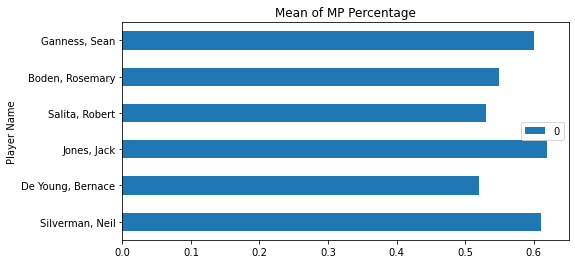

In [164]:
b = df['player'].isin(players)
pd.DataFrame([stats[0] for stats in df['all_MA_Mean_Count_Std'][b]],index=df['name'][b]).plot(kind='barh', xlabel='Player Name', title='Mean of MP Percentage', figsize=(8,4))

In [165]:
# handy label, title dictionary
declarer_history_d = {'xlabel':'Earlier <-----> Later', 'ylabel':'MP Percentage Result', 'title':'Declarer Results History'}

In [166]:
# takes 3m
import numpy as np
mini_acbl_cgdf = acbl_cgdf[['Declarer','Declarer_Pct']].groupby('Declarer')
filtered_mini_acbl_cgdf = [(p,pdf) for p,pdf in mini_acbl_cgdf if len(pdf) >= minimum_declares]
slope_x_p = {}
for player,pdf in filtered_mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts.values
    #z = np.polyfit(xvalues, yvalues, 1) # z[0] is slope
    #p = np.poly1d(z)
    w = [p/len(yvalues) for p in range(1,len(yvalues)+1)]
    moving_average = [sum(w[:n]*yvalues[:n])/sum(w[:n]) for n in range(1,len(yvalues)+1)]
    z = np.polyfit(xvalues, moving_average, 1) # z[0] is slope
    p = np.poly1d(z)
    slope_x_p[player] = (z[0], xvalues, p)
slopedf = pd.DataFrame([(player,slope[0]) for player,slope in slope_x_p.items()],columns=['Player','Slope'])
slopedf

,Player,Slope
0,#1402,-0.31
1,1000365,-0.01
2,1000489,-0.08
3,1000543,-0.02
4,1000810,-0.40
5,1000837,-0.14
6,1000969,0.26
7,1001175,-0.25
8,1001426,-0.27
9,1001477,-0.06


In [167]:
slopedf['abs_Slope'] = abs(slopedf['Slope'])
slopedf['Name'] = slopedf['Player'].map(lambda x: acbl_playerd[x])
slopedf['Declarer_Count'] = slopedf['Player'].map(lambda x: len(mini_acbl_cgdf.get_group(x)))
playersdf = slopedf[slopedf['Declarer_Count'] > 200].nlargest(50,'abs_Slope').sort_values('abs_Slope',ascending=False)
playersdf

,Player,Slope,abs_Slope,Name,Declarer_Count
22928,4503961,0.31,0.31,"DiCostanzo, Geri",209
31552,5738873,-0.31,0.31,"Mahood, Marcia",204
45593,7897723,0.30,0.30,"Libchaber, David",257
391,1083600,0.29,0.29,"Sullivan, Sandi",242
32749,5917123,-0.27,0.27,"Jacobs, Harris",341
7615,2164272,-0.27,0.27,"Alexandro, Frank",202
28341,5295939,0.25,0.25,"Britton, Cheryl",239
638,1135619,0.24,0.24,"Zenk, Stephen",206
16731,3554783,0.23,0.23,"Fredrickson, Norah",224
47131,8183899,-0.23,0.23,"Ariss, Samir",250


In [168]:
slopedf[slopedf['Name'].str.contains('Neiman')].sort_values('Name')

,Player,Slope,abs_Slope,Name,Declarer_Count
43333,7607342,-0.02,0.02,"Neiman, David",75
31141,5677696,0.04,0.04,"Neiman, Deborah",107
11303,2690942,-0.09,0.09,"Neiman, Nancy",438
47248,8203865,-0.01,0.01,"Neimand, Jon",108


In [169]:
players = ['1697013','1709925','2663279','8016437','2195097','2454602','2663279','2342200','8016437','8071683']
slopedf[slopedf['Player'].isin(players)].sort_values('Name')

,Player,Slope,abs_Slope,Name,Declarer_Count
46193,8016437,-0.00,0.00,"Boden, Rosemary",691
7845,2195097,-0.02,0.02,"De Young, Bernace",167
9307,2454602,-0.07,0.07,"Flom, Kerry",101
46478,8071683,-0.01,0.01,"Ganness, Sean",908
8763,2342200,0.02,0.02,"Jones, Jack",821
4429,1697013,-0.49,0.49,"Nesbit, Gary",34
11008,2663279,0.05,0.05,"Salita, Robert",414
4513,1709925,-0.02,0.02,"Silverman, Neil",1317


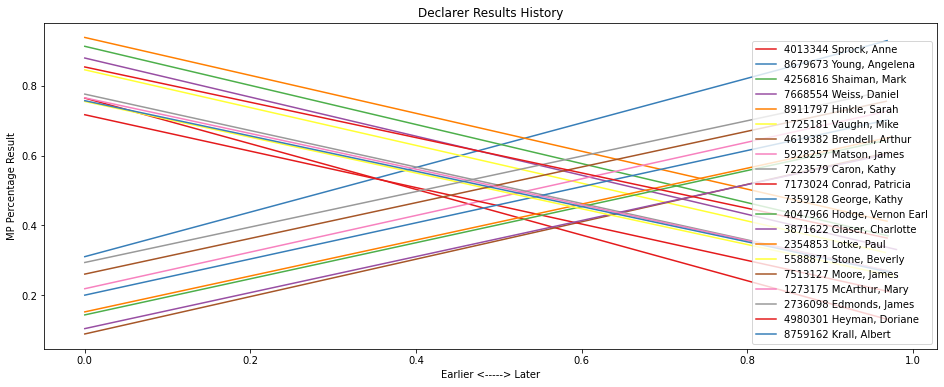

In [170]:
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only 9 colors
fig, ax = plt.subplots(figsize=(16,6))
ax.set(**declarer_history_d)
ax.set_prop_cycle(color=colors)
slopedf['abs_Slope'] = abs(slopedf['Slope'])
players = slopedf.nlargest(20,'abs_Slope')['Player']
for player in players:
    slope,xvalues,p = slope_x_p[player]
    plt.plot(xvalues, p(xvalues), label=player+' '+acbl_playerd[player])
plt.legend()

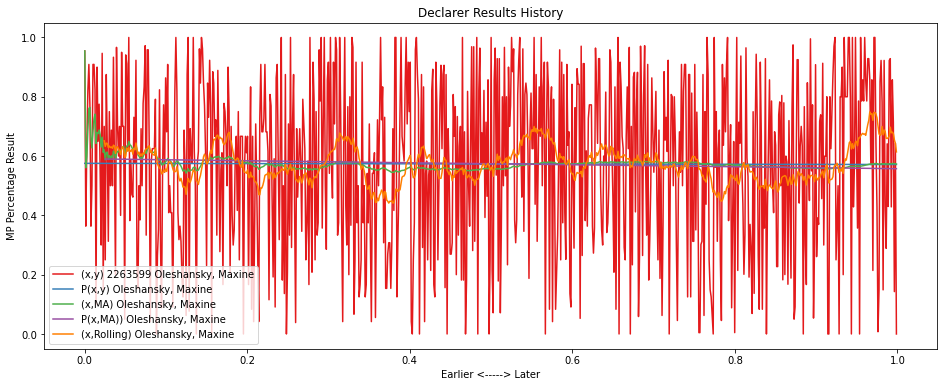

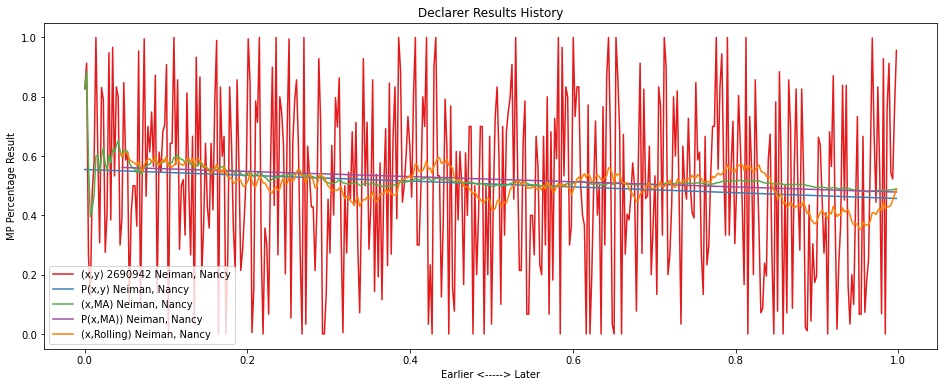

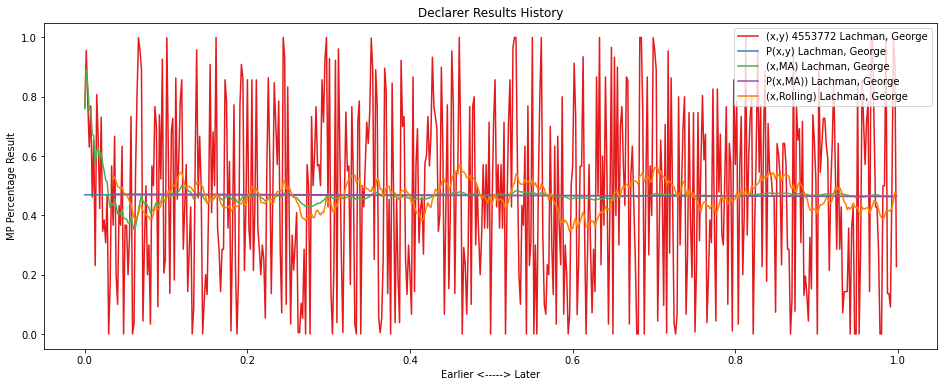

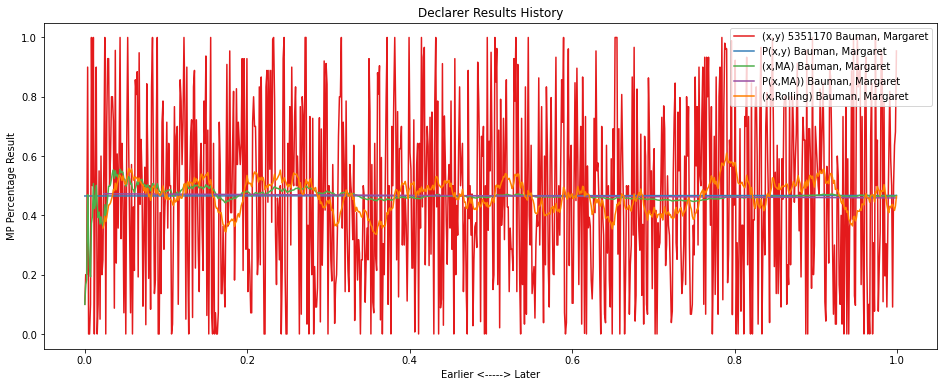

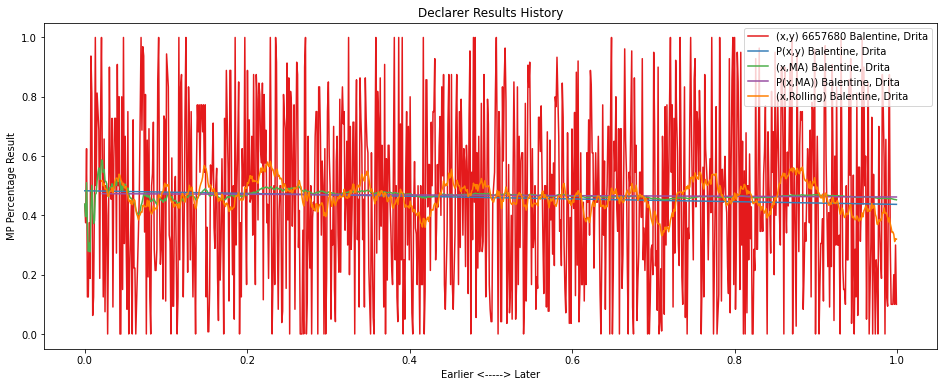

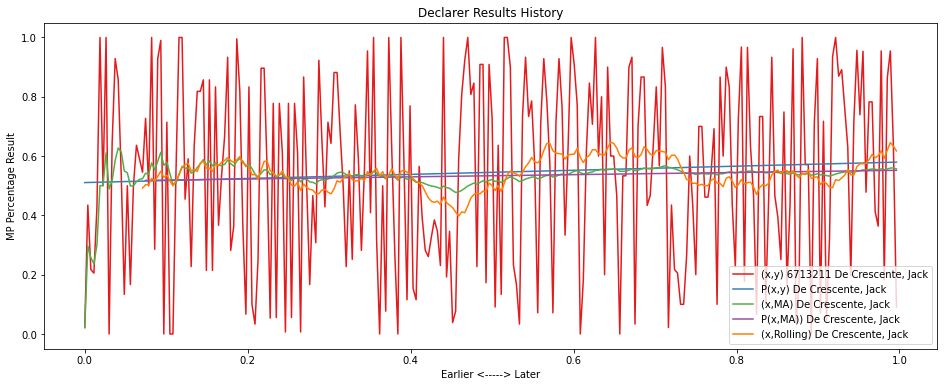

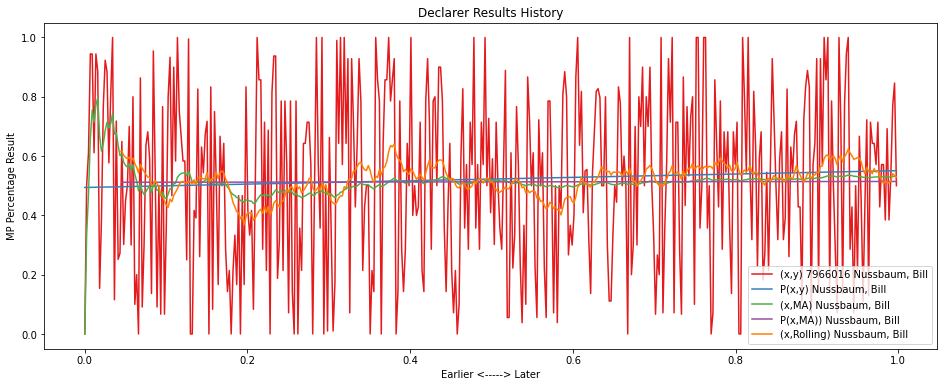

In [171]:
# show history of declarer results using trendlines. One player per plot.
import numpy as np
#players = ['1697013','1709925','2663279','8016437','6657680'] #,'2195097','2454602','2663279','2342200','8016437','8071683']
players = ['5351170','6657680','7966016','2690942','2263599','6713211','4553772']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
for player,pdf in mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set(**declarer_history_d)
    ax.set_prop_cycle(color=colors)
    plt.plot(xvalues, yvalues, label='(x,y) '+player+' '+acbl_playerd[player])
    z = np.polyfit(xvalues, yvalues, 1) # z[0] is slope
    p = np.poly1d(z)
    plt.plot(xvalues, p(xvalues), label='P(x,y) '+acbl_playerd[player])
    w = [p/len(yvalues) for p in range(1,len(yvalues)+1)]
    moving_average = [sum(w[:n]*yvalues[:n])/sum(w[:n]) for n in range(1,len(yvalues)+1)]
    #print(len(xvalues[:len(moving_average)]),len(moving_average))
    plt.plot(xvalues, moving_average, label='(x,MA) '+acbl_playerd[player])
    z = np.polyfit(xvalues, moving_average, 1) # z[0] is slope
    p = np.poly1d(z)
    plt.plot(xvalues[20:], p(xvalues)[20:], label='P(x,MA)) '+acbl_playerd[player])
    rolling = yvalues.rolling(30,20)
    plt.plot(xvalues, rolling.mean(), label='(x,Rolling) '+acbl_playerd[player])
    #z = np.polyfit(xvalues, pcts.rolling(30,10).mean(), 1) # z[0] is slope
    #p = np.poly1d(z)
    #plt.plot(xvalues, p(xvalues), label='P(x,Rolling)) '+acbl_playerd[player])
    plt.legend()

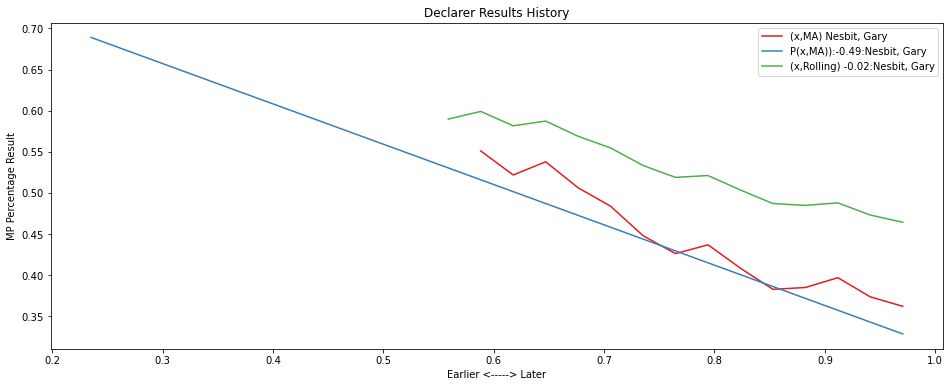

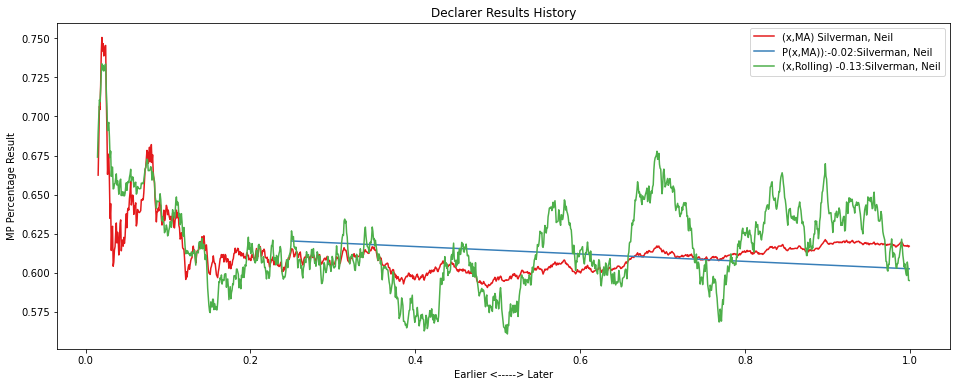

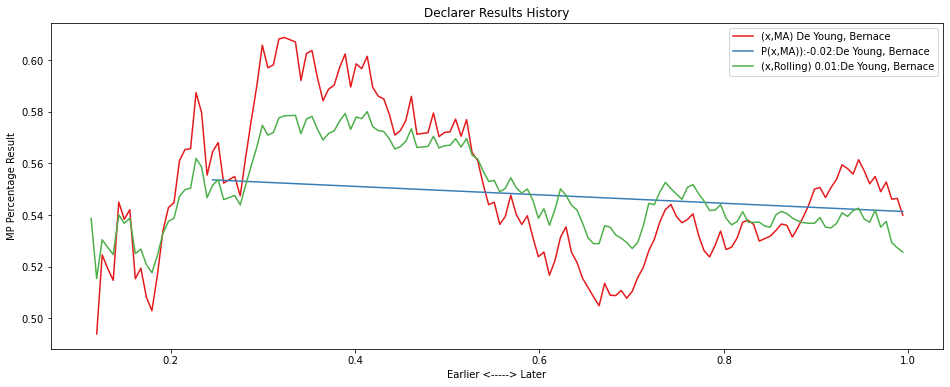

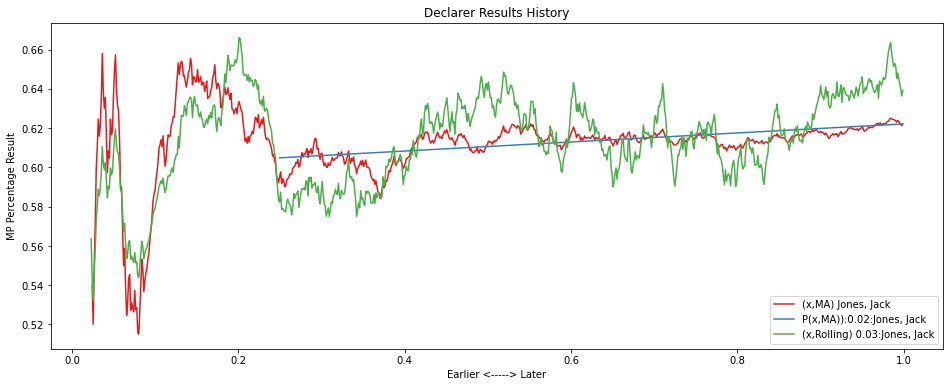

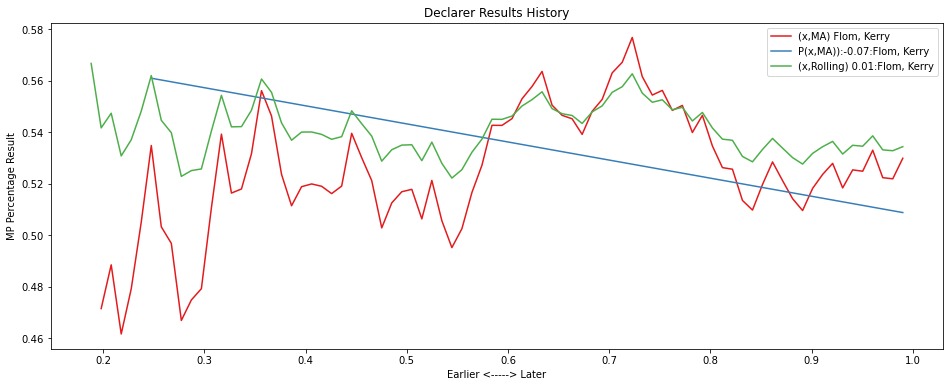

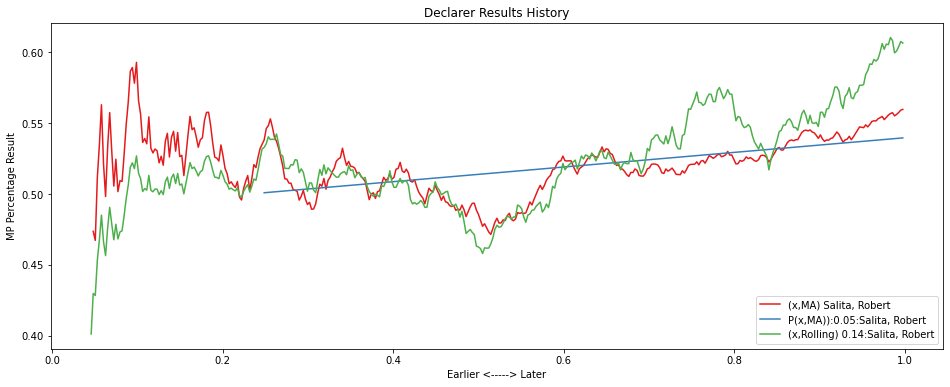

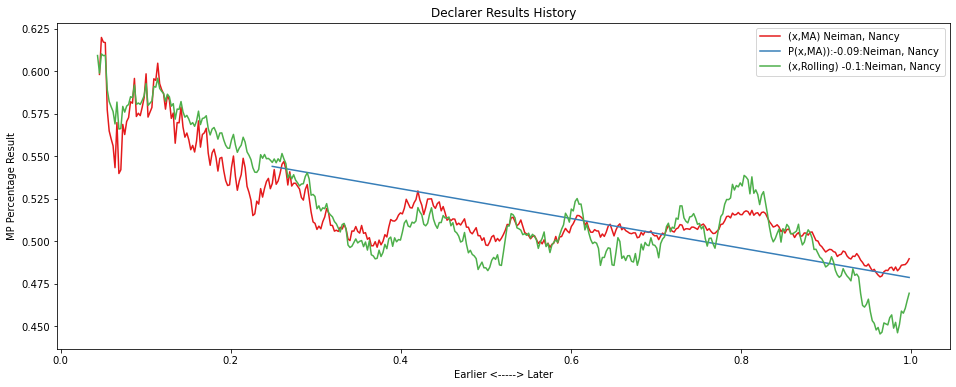

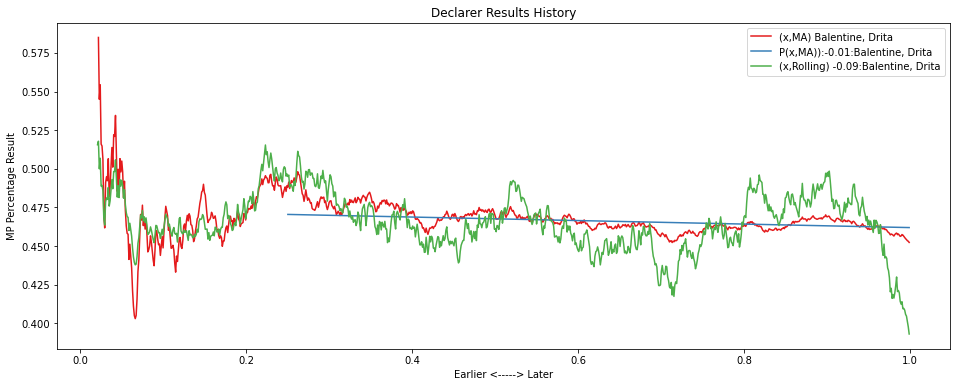

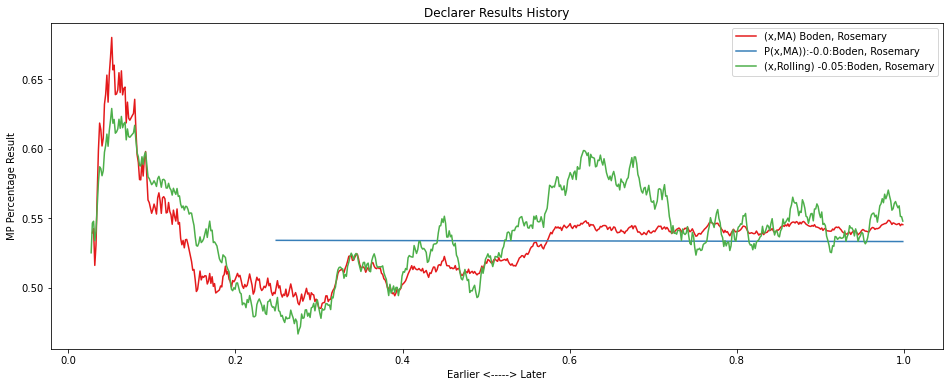

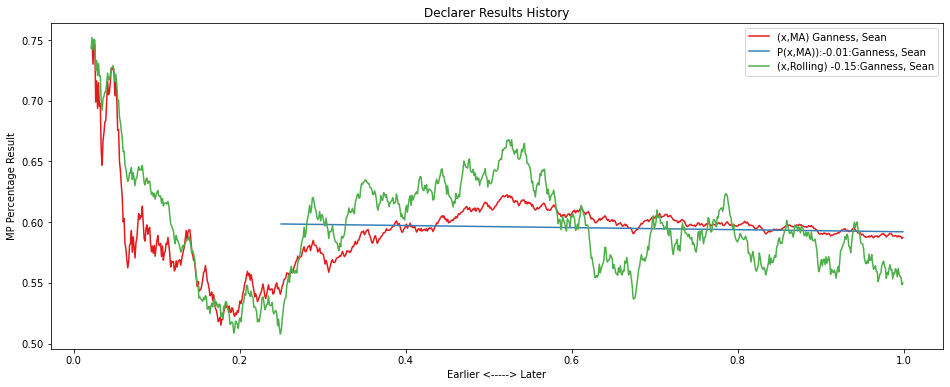

In [172]:
# show history of declarer results using trendlines. One player per plot.
# todo: looks like a better test for trends, instead of slope, is to look for higher highs and lower lows.
# slope may not be a good indicator as there are many factors effecting percentage such as online/partner/club/strata/bad-day.
import numpy as np
players = ['1697013','1709925','2663279','2195097','2454602','2663279','2342200','8016437','8071683','6657680','2690942']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
for player,pdf in mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts
    w = [p/len(yvalues) for p in range(1,len(yvalues)+1)]
    moving_average = [sum(w[:n]*yvalues[:n])/sum(w[:n]) for n in range(1,len(yvalues)+1)]
    #print(len(xvalues[:len(moving_average)]),len(moving_average))
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set(**declarer_history_d)
    ax.set_prop_cycle(color=colors)
    plt.plot(xvalues[20:], moving_average[20:], label='(x,MA) '+acbl_playerd[player])
    z = np.polyfit(xvalues, moving_average, 1) # z[0] is slope
    p = np.poly1d(z)
    l = int(len(yvalues)*.25) # experiment with ignoring 25% of beginning
    plt.plot(xvalues[l:], p(xvalues)[l:], label='P(x,MA)):'+str(round(z[0],2))+':'+acbl_playerd[player])
    rolling = yvalues.rolling(100,20).mean()
    #print(rolling.iloc[range(30,len(yvalues),50)],rolling.max())
    plt.plot(xvalues, rolling, label='(x,Rolling) '+str(round(rolling.iloc[-1]-rolling.iloc[30],2))+':'+acbl_playerd[player])
    #plt.plot(xvalues, rolling, label='(x,max) '+str(round(rolling.iloc[-1]-rolling.max(),2))+':'+acbl_playerd[player])
    #z = np.polyfit(xvalues, pcts.rolling(30,10).mean(), 1) # z[0] is slope
    #p = np.poly1d(z)
    #plt.plot(xvalues, p(xvalues), label='P(x,Rolling)) '+acbl_playerd[player])
    plt.legend()

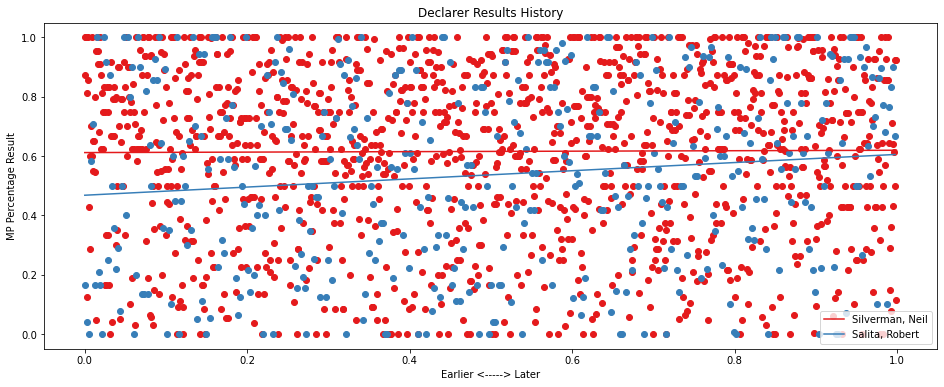

In [173]:
# show multiple player's history of declarer results.
# experiment with scatter plot and trendline.
players = ['1709925','2663279']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
fig, ax = plt.subplots(figsize=(16,6))
ax.set(**declarer_history_d)
ax.set_prop_cycle(color=colors)
for player,pdf in mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts.values
    _ = ax.scatter(xvalues, yvalues)
    z = np.polyfit(xvalues, yvalues, 1)
    p = np.poly1d(z)
    plt.plot(xvalues, p(xvalues), label=acbl_playerd[player])
plt.legend()

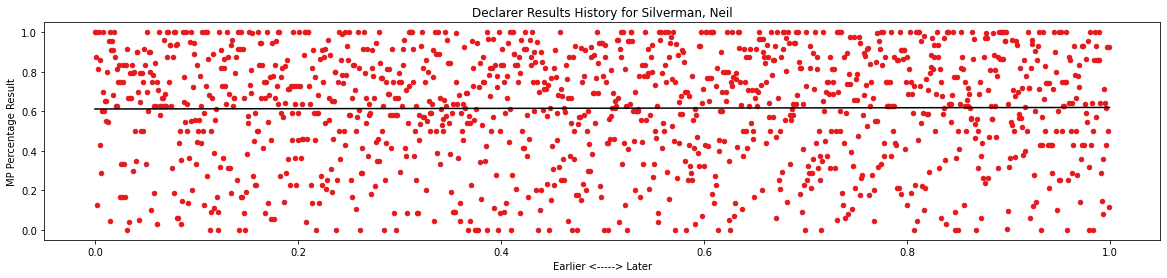

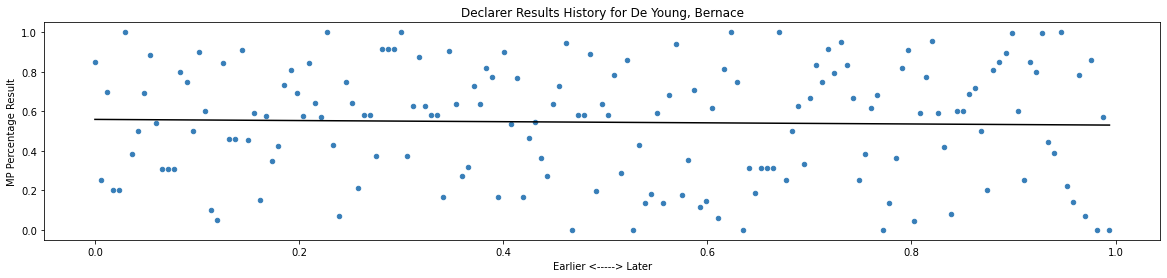

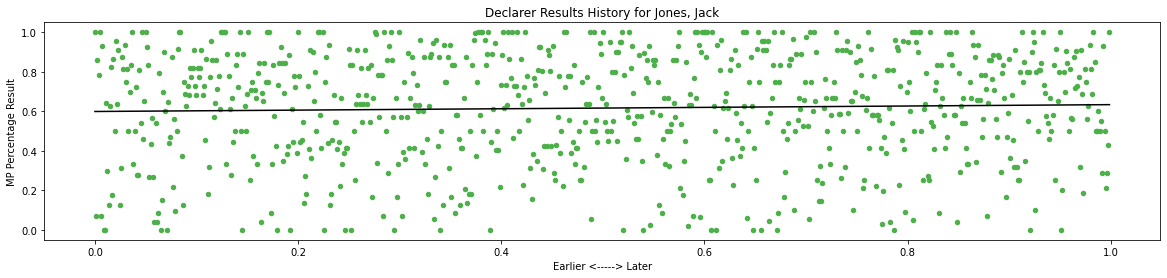

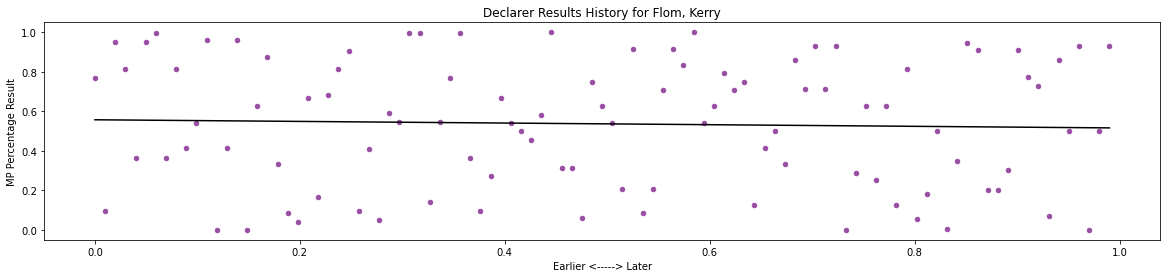

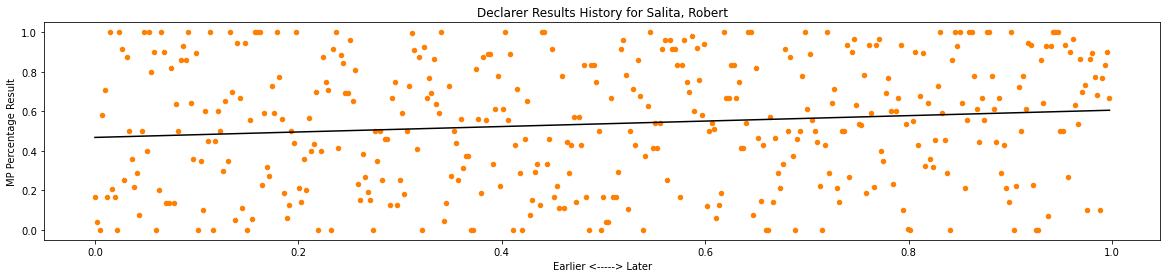

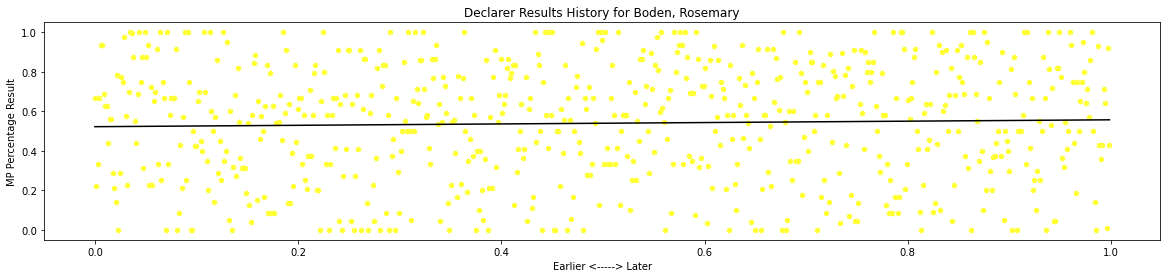

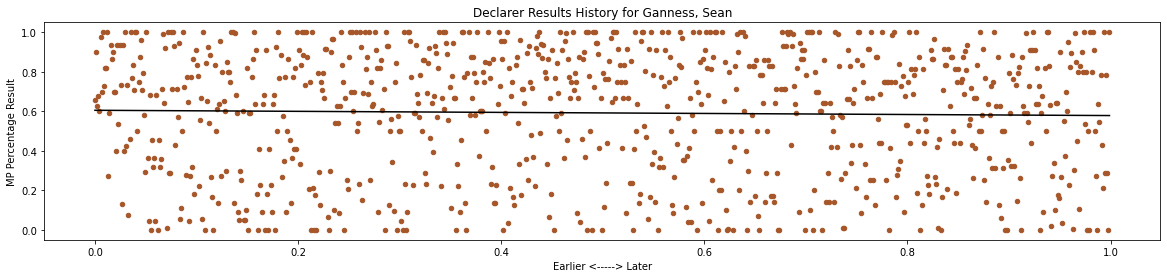

In [174]:
# show plots of each player's history of declarer results.
# experiment with scatter plot and trendline.
players = ['1709925','2663279','2195097','2454602','2663279','2342200','8016437','8071683']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
for color,(player,pdf) in zip(colors,mini_acbl_cgdf):
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts.values
    columns = ['Declarer_History','MP_Pct']
    plotdf = pd.DataFrame(zip(xvalues,yvalues),columns=columns)
    scatter = plotdf.plot(kind='scatter', color=color, x=columns[0], y=columns[1], figsize=(20,4))
    declarer_history_d['title'] = 'Declarer Results History for '+acbl_playerd[player] # caution: modifying title
    scatter.set(**declarer_history_d)
    #scatter.set(xlabel='Earlier <-----> Later', ylabel='MP Percentage Result', )
    z = np.polyfit(xvalues, yvalues, 1)
    p = np.poly1d(z)
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    scatter.plot(xvalues, p(xvalues),'k-', label=acbl_playerd[player])

<AxesSubplot:>

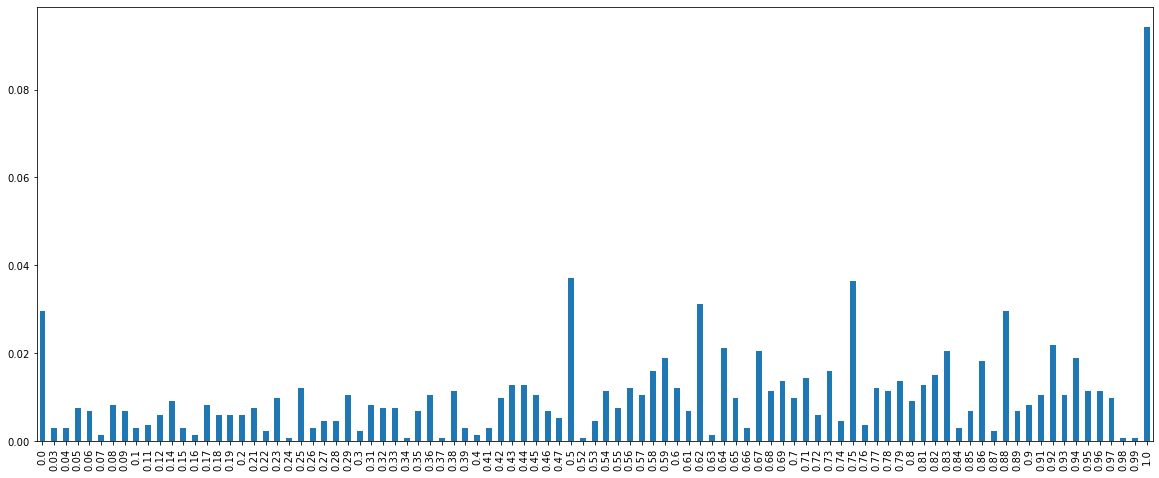

In [175]:
# takes 5s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
s = g.get_group('1709925')['Declarer_Pct'].astype('float').round(2).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,8))
s

<AxesSubplot:>

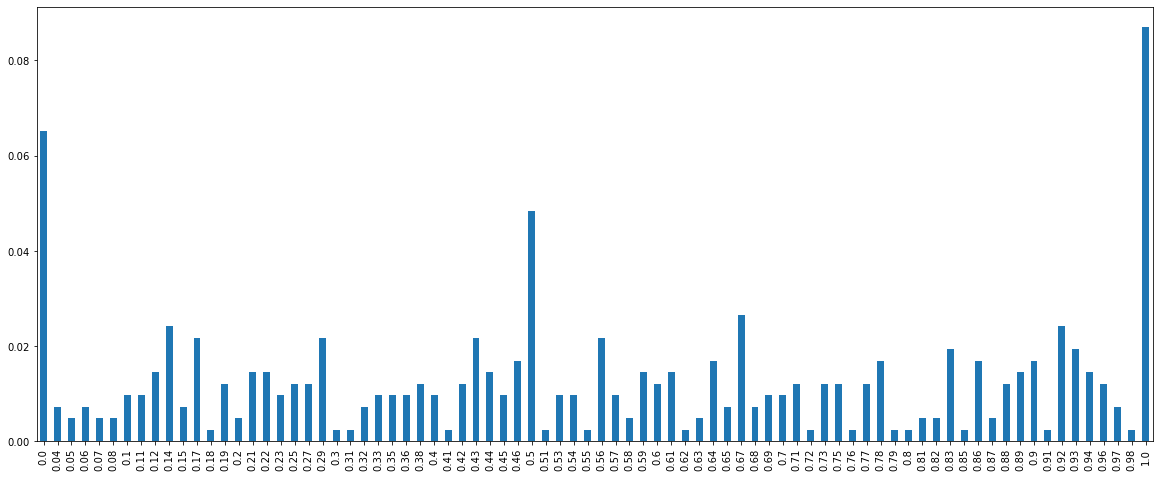

In [176]:
# takes 2s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
s = g.get_group('2663279')['Declarer_Pct'].astype('float').round(2).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,8))
s

<AxesSubplot:>

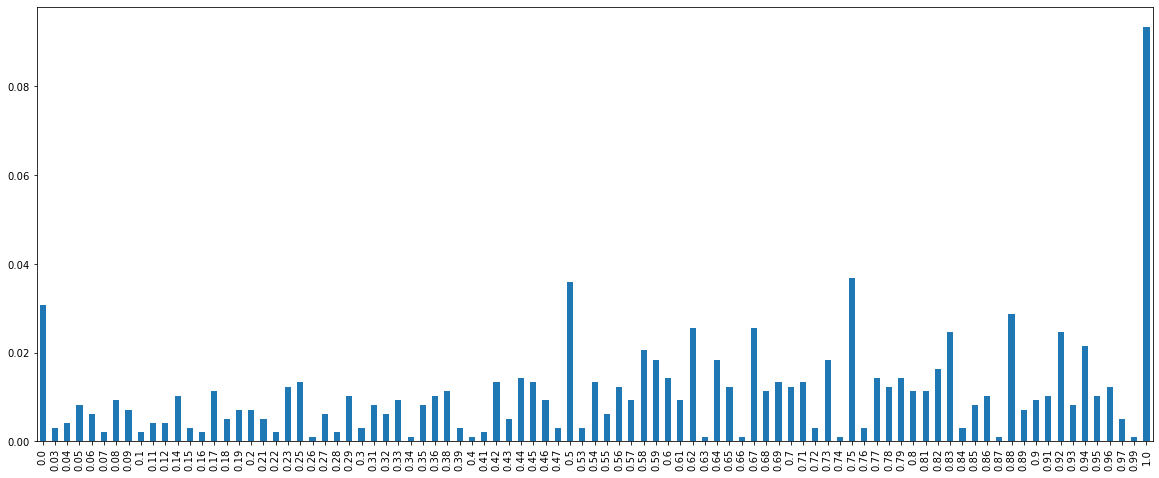

In [177]:
# takes 2s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
s = g.get_group('1709925')[g.get_group('1709925')['Club'] == '108571']['Declarer_Pct'].astype('float').round(2).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,8))
s

In [178]:
# takes 2s
# Get player numbers from name. Requires exact name for lookup
name_lookups = ['Salita, Robert', 'Silverman, Neil', 'Ganness, Sean']
number_names = [(k,acbl_playerd[k]) for k in g.groups.keys() if acbl_playerd[k] in name_lookups]
number_names

[('1709925', 'Silverman, Neil'),
 ('2663279', 'Salita, Robert'),
 ('8071683', 'Ganness, Sean')]

<AxesSubplot:>

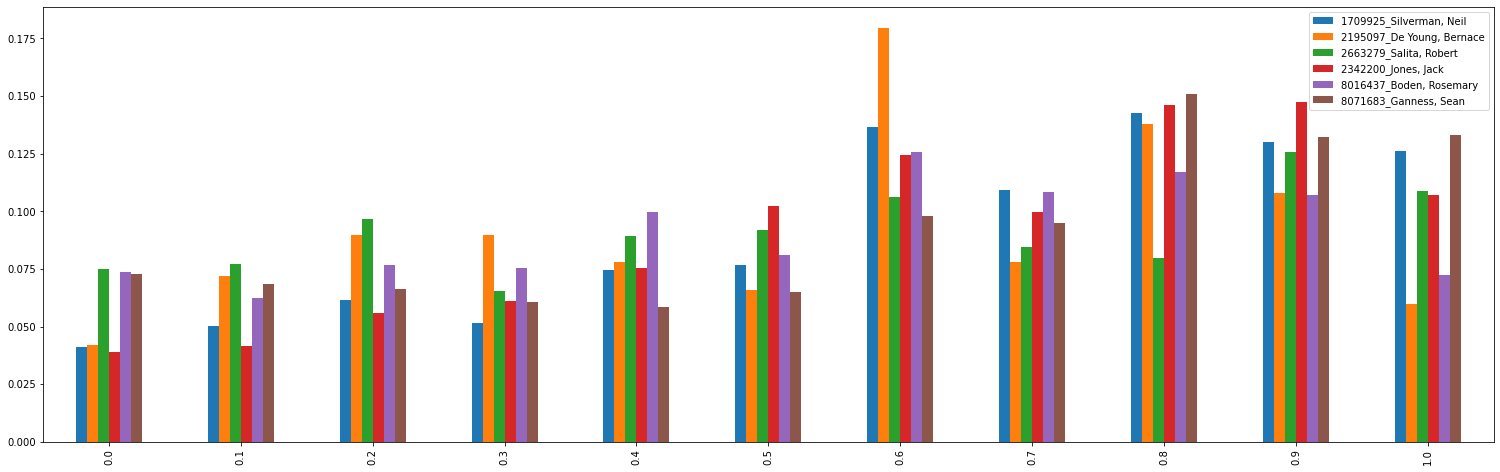

In [179]:
# takes 1s
# Compare two player's Declarer_Pct
plotd = {}
# Kerry Flom '2454602' disappeared. Must have been dropped.
players = ['1709925','2195097','2663279','2342200','8016437','8071683']
for p in players:
    pg = g.get_group(p)
    n = p+'_'+acbl_playerd[p]
    # warning: Need to do astype('float') before round() otherwise round() will have no effect.
    plotd[n] = pg['Declarer_Pct'].astype('float').round(1).value_counts(normalize=True).sort_index()
s = pd.DataFrame(plotd).plot(kind='bar',figsize=(26,8))
s

In [180]:
g.get_group('2663279')

,Club,Declarer,Pct,Declarer_Pct,NSEW,Score,Declarer_Score,Declarer_Par,Declarer_MP,Dummy_MP,Geometric_MP
1951256,108571,2663279,0.83,0.17,E,-90,90,-100,157.19,2755.32,433108.75
1951264,108571,2663279,0.96,0.04,E,500,-500,120,157.19,2755.32,433108.75
1951265,108571,2663279,1.00,0.00,E,200,-200,300,157.19,2755.32,433108.75
1951266,108571,2663279,0.42,0.58,E,-620,620,90,157.19,2755.32,433108.75
1951270,108571,2663279,0.29,0.71,E,-140,140,420,157.19,2755.32,433108.75
1951273,108571,2663279,0.83,0.17,E,50,-50,980,157.19,2755.32,433108.75
1951274,108571,2663279,0.00,1.00,E,-520,520,-120,157.19,2755.32,433108.75
1951275,108571,2663279,0.79,0.21,E,-600,600,-140,157.19,2755.32,433108.75
1951276,108571,2663279,0.83,0.17,E,-110,110,-110,157.19,2755.32,433108.75
1951278,108571,2663279,1.00,0.00,E,150,-150,110,157.19,2755.32,433108.75


In [197]:
# takes 40s
# todo: switch this back to single line? switch to defaultdict(list)? Redo collecting indexes instead of lists of values.
# todo: more 'Declarer_PctAvg' and 'Declarer_Name' to acbl-board-results-cleanup?
dealers = []
names = []
par = []
parbeats = []
pctavg = []
mps = []
geomp = []
count = []

for k,gg in g:
    #if k != '2663279':
    #    continue
    if k.isnumeric() and len(gg) > 30:
        # make boolean list for whether player's score beats or equals par.
        pb = [int(score) >= par if nsew in 'NS' else int(score) <= par for nsew,score,par in zip(gg['NSEW'],gg['Score'],gg['Declarer_Par'])]
        if len(pb) > 30: # want 30+ boards to determine par beat score.[score[0] == '-':]
            dealers.append(k)
            names.append(acbl_playerd[k]) # Note Declarer_Name can change through lifetime. Use last instance?
            parbeats.append(sum(pb)/len(pb))
            pctavg.append(gg['Declarer_Pct'].mean())
            geomp.append((gg['Declarer_MP']*gg['Dummy_MP']).mean())
            mps.append(gg.iloc[-1]['Declarer_MP'].max())
            count.append(len(gg))
ggdf = pd.DataFrame({'Dealer':dealers,'Name':names,'Par_Beats':parbeats,'Declarer_PctAvg':pctavg,'Declarer_MP':mps,'Geometric_MP':geomp,'Count':count})
ggdf['Par_Beats_PctAvg'] = ggdf['Par_Beats']*ggdf['Declarer_PctAvg']
ggdf

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
0,1000365,"Fearen, Diane",0.65,0.46,97.99,25305.65,169,0.30
1,1000489,"Lubich, Dan",0.60,0.47,111.26,130474.18,288,0.28
2,1000543,"Jackson, Newt",0.67,0.57,189.24,29207.94,395,0.38
3,1000810,"Woeste, John",0.64,0.46,871.07,1495232.65,56,0.30
4,1000837,"Nitta, Ken",0.43,0.39,21.13,251.98,37,0.17
5,1000969,"Erbil, Guher",0.65,0.47,177.33,268052.05,51,0.31
6,1001175,"Delahan, Franz",0.63,0.48,917.61,806510.07,84,0.30
7,1001426,"Reynders, Ludo",0.58,0.42,25.72,2891.21,45,0.24
8,1001477,"Brown, Charlie",0.61,0.50,3389.15,14769376.49,174,0.31
9,1001515,"Stanczyk, Gerri",0.55,0.48,123.75,16415.14,82,0.26


In [198]:
ggdf.sort_values('Declarer_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
19229,3935159,"Roseberry, Dan",0.73,0.77,9217.21,86700746.87,33,0.56
42506,7555938,"Wolf, Peg",0.72,0.76,210.16,128976.64,39,0.54
43236,7657072,"Johann, Robert",0.75,0.74,573.42,118617.67,52,0.56
47967,8429286,"Martel, P",0.70,0.74,1403.62,1568435.32,40,0.52
18874,3886492,"Maclin, Bruce",0.63,0.73,4328.58,30182680.65,59,0.46
33834,6088643,"Jackson, Steve",0.72,0.73,1525.31,5546102.07,47,0.53
46281,8131244,"West, Douglas",0.63,0.72,3915.69,4130817.11,35,0.46
46610,8189714,"Hall, Kaye",0.90,0.72,651.16,485011.73,61,0.65
23416,4600789,"Barry, Jean",0.74,0.72,11788.75,76283431.41,54,0.53
6043,1980998,"Skurcenski, Gerald",0.83,0.71,9.90,604.12,47,0.59


In [199]:
ggdf[ggdf['Dealer'] == '1709925'].sort_values('Declarer_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
4464,1709925,"Silverman, Neil",0.69,0.62,11372.30,43556817.07,1317,0.43


In [200]:
ggdf[ggdf['Dealer'] == '2663279'].sort_values('Declarer_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
10881,2663279,"Salita, Robert",0.66,0.54,212.71,313600.37,414,0.36


In [201]:
ggdf.sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
21396,4297245,"Lewis, David",0.91,0.55,175.06,43324.43,32,0.50
46610,8189714,"Hall, Kaye",0.90,0.72,651.16,485011.73,61,0.65
17151,3627152,"McGregor, Willow",0.90,0.55,184.03,34013.80,49,0.50
36245,6704794,"Tennant, Bruce",0.89,0.58,1595.19,487050.47,36,0.52
50066,8791473,"Zhang, Fan",0.89,0.62,1559.04,3339618.99,35,0.55
40566,7330278,"Stafford, Michelle",0.88,0.54,233.07,227521.95,42,0.48
44985,7882025,"Houde, Andre",0.88,0.67,3570.50,9005094.00,41,0.58
17808,3731731,"Darfler, Jeri",0.88,0.56,246.15,132110.29,41,0.49
36165,6684602,"Mathews, Brenda",0.88,0.63,1402.14,1757077.31,32,0.55
21470,4314832,"Pitura, Leonard",0.87,0.50,66.10,4595.41,39,0.44


In [211]:
players = ['5966329','1709925','2195097','2454602','2663279','2342200','8016437','8071683','4897560','6529224','6672000','1320998']
players += ['2216833','8691576','3565408','8744475','8471908','4036956','3486443','4541995','5922984','4460359','4606868','5511054']
ggdf[ggdf['Dealer'].isin(players)].sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
1900,1320998,"Lishkov, Aleksandar",0.76,0.57,361.09,219073.71,50,0.43
19880,4036956,"Shenkin, Barnet",0.73,0.60,6209.14,35644183.21,455,0.44
16660,3565408,"Pavlicek, Richard",0.73,0.60,18611.12,94914951.43,135,0.44
23444,4606868,"Kristinsson, Jakob",0.72,0.62,5008.87,13015805.53,79,0.44
36098,6672000,"Silverstein, Aaron",0.70,0.64,21670.82,95838268.96,233,0.45
35562,6529224,"Pollack, Frederic",0.70,0.62,14592.69,45197154.59,77,0.43
7909,2216833,"Seamon-Molson, Janice",0.70,0.62,20995.09,60851767.24,383,0.43
22338,4460359,"Phillips, Joe",0.70,0.56,5383.40,19113391.75,614,0.39
8662,2342200,"Jones, Jack",0.70,0.62,3902.09,32474524.26,821,0.43
48169,8471908,"Kislitsyna, Irina",0.69,0.60,4569.93,30121604.61,370,0.41


In [203]:
ggdf[ggdf['Dealer'].isin(players)].sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
1900,1320998,"Lishkov, Aleksandar",0.76,0.57,361.09,219073.71,50,0.43
19880,4036956,"Shenkin, Barnet",0.73,0.60,6209.14,35644183.21,455,0.44
16660,3565408,"Pavlicek, Richard",0.73,0.60,18611.12,94914951.43,135,0.44
23444,4606868,"Kristinsson, Jakob",0.72,0.62,5008.87,13015805.53,79,0.44
36098,6672000,"Silverstein, Aaron",0.70,0.64,21670.82,95838268.96,233,0.45
35562,6529224,"Pollack, Frederic",0.70,0.62,14592.69,45197154.59,77,0.43
7909,2216833,"Seamon-Molson, Janice",0.70,0.62,20995.09,60851767.24,383,0.43
22338,4460359,"Phillips, Joe",0.70,0.56,5383.40,19113391.75,614,0.39
8662,2342200,"Jones, Jack",0.70,0.62,3902.09,32474524.26,821,0.43
48169,8471908,"Kislitsyna, Irina",0.69,0.60,4569.93,30121604.61,370,0.41


In [204]:
ggdf[ggdf['Count']>=100].sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
31352,5758564,"Loeb, Maureen",0.83,0.64,3444.68,11040801.79,103,0.54
36654,6749445,"McKeague, Judy",0.82,0.57,1097.56,1348604.75,100,0.46
809,1183095,"Silliman, Jack",0.81,0.58,230.96,2598.10,100,0.47
2254,1378279,"Ehlers, William",0.81,0.61,9748.76,64605356.82,126,0.50
42755,7596391,"Pratt, Suzi",0.80,0.54,1248.58,1913922.27,102,0.44
12118,2874008,"Borenstein, Suzanne",0.80,0.49,613.84,615554.38,102,0.40
19760,4017552,"Keisman, Myrna -g-",0.80,0.65,1149.25,928570.30,111,0.52
12434,2929538,"Givner, Donna",0.80,0.53,2142.41,6129103.20,100,0.42
50720,8915369,"Afdahl, Kay",0.80,0.60,10130.21,123622764.63,120,0.48
2246,1377132,"Morgan, Jinny",0.80,0.59,404.47,201499.76,113,0.47


In [205]:
ggdf.nlargest(100,'Count').sort_values('Par_Beats_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
31665,5818389,"Boyle, Brad",0.69,0.63,2804.48,14527941.84,1154,0.44
3243,1526189,"Lewis, Robert",0.69,0.63,4931.77,13631044.79,1258,0.43
4464,1709925,"Silverman, Neil",0.69,0.62,11372.30,43556817.07,1317,0.43
25728,5021456,"Anderson, Bill",0.69,0.61,11333.40,99032856.04,2165,0.42
32304,5907438,"Anderson, Alice",0.67,0.63,11773.62,96152884.05,2157,0.42
3297,1539981,"Colton, Robert",0.67,0.61,9581.21,42469053.14,1118,0.41
31756,5835054,"Walter, Lew",0.70,0.58,7616.35,62495795.58,925,0.41
6306,2010216,"Goldman, Alan",0.70,0.58,7962.33,29467214.71,1025,0.41
45940,8071683,"Ganness, Sean",0.68,0.59,13657.50,32393163.54,908,0.40
34833,6311830,"Day, Wilson",0.67,0.60,6491.85,29896830.57,973,0.40


In [209]:
ggdf[ggdf['Par_Beats'].ge(.65) & ggdf['Count'].ge(100) & ggdf['Declarer_PctAvg'].ge(.54)].sort_values('Geometric_MP',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
11575,2752468,"Rutledge, Tom",0.66,0.63,28050.30,418153294.64,381,0.42
12539,2943239,"McLaughlin, Mark",0.67,0.57,19757.78,390028178.98,105,0.38
13019,3018938,"Joyce, Randy",0.68,0.60,27189.78,343310384.81,220,0.40
13002,3016048,"Allen, Ellen",0.67,0.60,26928.80,339219160.28,330,0.41
33179,5989906,"Brady, John",0.70,0.61,16380.75,318984099.35,141,0.43
47032,8263752,"Mansfield, Steve",0.71,0.63,14244.21,314921641.58,328,0.45
47466,8340773,"Daling, Janet",0.67,0.63,25576.19,312103174.39,314,0.43
29450,5485398,"Goldstein, Rick",0.69,0.61,17099.79,277069209.34,220,0.42
13234,3053709,"Brill, Laura",0.66,0.58,16399.86,266156859.96,224,0.38
9106,2433338,"Joyce, Kay",0.70,0.63,24902.03,253696661.52,345,0.44


In [210]:
ggdf[ggdf['Count'].ge(1200)].sort_values('Geometric_MP',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
25728,5021456,"Anderson, Bill",0.69,0.61,11333.40,99032856.04,2165,0.42
32304,5907438,"Anderson, Alice",0.67,0.63,11773.62,96152884.05,2157,0.42
12915,2997630,"Ionis-Sorren, Bella",0.68,0.58,12658.19,67826692.84,1491,0.39
4464,1709925,"Silverman, Neil",0.69,0.62,11372.30,43556817.07,1317,0.43
16498,3551113,"Willenborg, Irma",0.69,0.53,9177.55,42450433.37,1251,0.37
1822,1310577,"O'Rourke, Michael",0.66,0.57,2494.96,14593679.01,1489,0.38
3243,1526189,"Lewis, Robert",0.69,0.63,4931.77,13631044.79,1258,0.43
16276,3500470,"Petrey, Gene",0.65,0.50,3847.17,9828188.33,1208,0.32
23243,4574885,"Wagner Jr, Kenneth",0.65,0.51,3962.78,6007275.74,1726,0.33
3245,1527622,"Webster, Shirleyanne",0.66,0.53,2942.91,2859495.08,2055,0.34


In [208]:
ggdf.to_excel(acblPath.joinpath('ggdf.xlsx'))